In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('F:\DO YOU HAVE IT IN YOU\python homework\Data Science Jobs Salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [4]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
244,2021e,SE,FT,Data Science Manager,7000000,INR,94917,IN,50,IN,L


In [5]:
df.describe()

,salary,salary_in_usd,remote_ratio
count,2.450000e+02,245.000000,245.000000
mean,5.025418e+05,99868.012245,69.183673
std,2.276230e+06,83983.326949,37.593421
min,4.000000e+03,2876.000000,0.000000
25%,6.000000e+04,45896.000000,50.000000
50%,1.030000e+05,81000.000000,100.000000
75%,1.740000e+05,130000.000000,100.000000
max,3.040000e+07,600000.000000,100.000000


In [6]:
df.shape

(245, 11)

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Mean of salaries in USD with respect to experience level

In [9]:
experience_grp = df.groupby(['experience_level'])

In [10]:
salary_usd_grp = experience_grp['salary_in_usd'].mean()

In [11]:
salary_usd_grp

experience_level
EN     59753.462963
EX    226288.000000
MI     85738.135922
SE    128841.298701
Name: salary_in_usd, dtype: float64

In [12]:
exp_grp = np.array(['EN','EX','MI','SE'])

<function matplotlib.pyplot.show(close=None, block=None)>

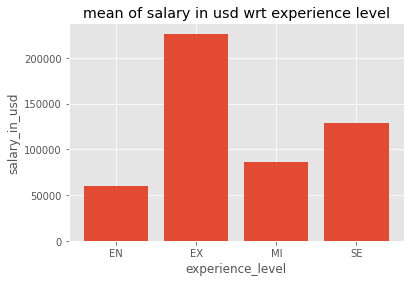

In [13]:
plt.style.use('ggplot')
plt.bar(exp_grp, salary_usd_grp)
plt.title('mean of salary in usd wrt experience level')
plt.xlabel('experience_level')
plt.ylabel('salary_in_usd')
plt.grid(True)
plt.show

# Top 5 jobs with respect to salaries in USD

In [14]:
job_grp = df.groupby(['job_title']).salary_in_usd.mean().sort_values(ascending=False)

In [15]:
job_grp = job_grp.head()

In [16]:
job_grp

job_title
Financial Data Analyst                450000.0
Applied Machine Learning Scientist    423000.0
Principal Data Engineer               392500.0
Head of Data                          232500.0
Principal Data Scientist              225097.8
Name: salary_in_usd, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

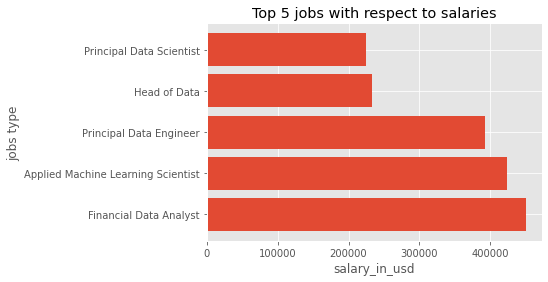

In [17]:
plt.style.use('ggplot')
plt.barh(job_grp.index, job_grp.values)
plt.title('Top 5 jobs with respect to salaries')
plt.xlabel('salary_in_usd')
plt.ylabel('jobs type')
plt.grid(True)
plt.show

So from above representation it is clear that Financial data analyst are highly paid among all.

# Top 5 companies location with respect to salary in USD 

In [18]:
emp_res = df.groupby(['company_location']).salary_in_usd.mean().sort_values(ascending=False)

In [20]:
emp_res

company_location
RU    157500.000000
US    145059.314815
JP    135922.250000
NZ    125000.000000
IL    119353.000000
Name: salary_in_usd, dtype: float64

In [21]:
emp_res= emp_res.head() 

<function matplotlib.pyplot.show(close=None, block=None)>

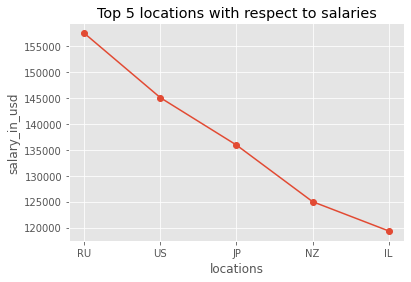

In [22]:
plt.style.use('ggplot')
plt.plot(emp_res.index, emp_res.values, marker= 'o')
plt.title('Top 5 locations with respect to salaries')
plt.xlabel('locations')
plt.ylabel('salary_in_usd')
plt.grid(True)
plt.show

same could be plotted using bar graph

<function matplotlib.pyplot.show(close=None, block=None)>

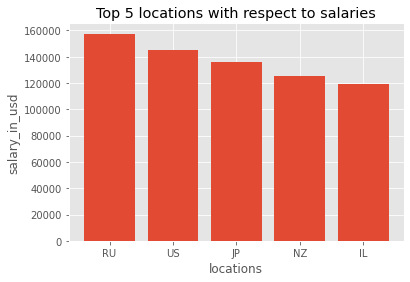

In [23]:
plt.style.use('ggplot')
plt.bar(emp_res.index, emp_res.values)
plt.title('Top 5 locations with respect to salaries')
plt.xlabel('locations')
plt.ylabel('salary_in_usd')
plt.grid(True)
plt.show

# Top 5 companies location with respect to least salary in USD

In [24]:
emp_res = df.groupby(['company_location']).salary_in_usd.mean().sort_values(ascending=True)
emp_res= emp_res.head() 



<function matplotlib.pyplot.show(close=None, block=None)>

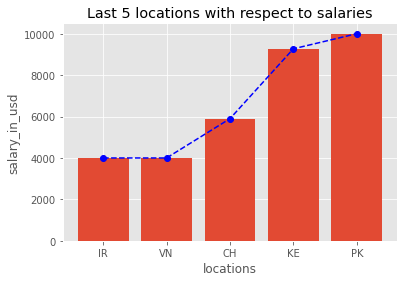

In [25]:
plt.style.use('ggplot')
plt.bar(emp_res.index, emp_res.values)
plt.plot(emp_res.index, emp_res.values, color = 'b', marker='o', linestyle= '--')
plt.title('Last 5 locations with respect to salaries')
plt.xlabel('locations')
plt.ylabel('salary_in_usd')
plt.grid(True)
plt.show

# Most prefered jobs in India

In [26]:
country_grp = df.groupby(['company_location'])

In [27]:
job_pref_IN = country_grp.get_group('IN').job_title.value_counts().sort_values(ascending=False)

In [28]:
job_pref_IN

Data Scientist                   5
Data Engineer                    2
Machine Learning Engineer        2
Big Data Engineer                2
3D Computer Vision Researcher    1
Data Analyst                     1
Data Science Consultant          1
Product Data Analyst             1
Lead Data Analyst                1
Data Science Manager             1
Name: job_title, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

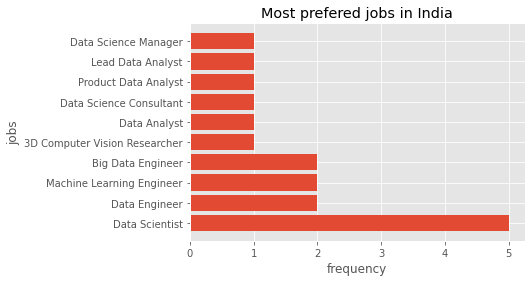

In [29]:
plt.style.use('ggplot')
plt.barh(job_pref_IN.index, job_pref_IN.values)
plt.title('Most prefered jobs in India')
plt.xlabel('frequency')
plt.ylabel('jobs')
plt.grid(True)
plt.show

# Relative share of employees by company size

In [30]:
companysize= df['company_size'].value_counts().sort_values(ascending=False)

In [31]:
labels = [x for x in df['company_size'].unique()]

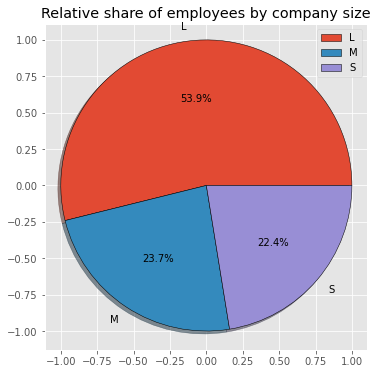

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.pie(companysize.values, labels=labels, autopct='%1.1f%%', shadow = True, frame = True, wedgeprops={'edgecolor':'black'})
plt.legend()
plt.title('Relative share of employees by company size')
plt.show()

Insights: It is very clear that the large companies are holding larger number of employees which is approx 54% of total employees.

# Relative share of employees by remote ratio

In [33]:
remoteratio= df['remote_ratio'].value_counts().sort_values(ascending=False)

In [34]:
remoteratio

100    134
50      71
0       40
Name: remote_ratio, dtype: int64

In [35]:
labels = ['Full remote', 'partial remote', 'no remote']

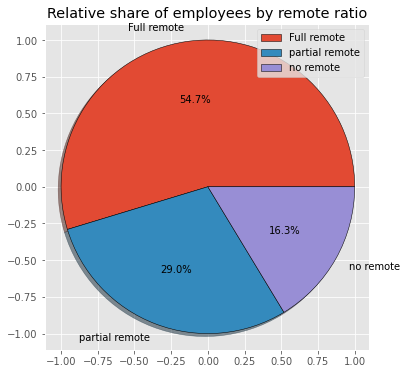

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(6,6))

plt.pie(remoteratio.values, labels=labels, autopct='%1.1f%%', shadow = True, frame = True, wedgeprops={'edgecolor':'black'})
plt.legend()
plt.title('Relative share of employees by remote ratio')
plt.show()

So it is very clear from it that majority of employees are working remotely

# Number of employee by year of joining


In [37]:
year= df['work_year'].value_counts()

In [38]:
year

2021e    179
2020      66
Name: work_year, dtype: int64

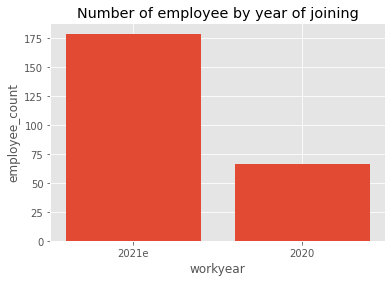

In [39]:
plt.style.use('ggplot')

plt.bar(year.index, year.values)
plt.xlabel('workyear')
plt.ylabel('employee_count')

plt.title('Number of employee by year of joining')
plt.grid(True)
plt.show()

Insights: Around 175 employees are estimated to join in 2021.


# Histogram of salary in USD 

In [40]:
salary_median= df['salary'].median()

In [41]:
salary_median

103000.0

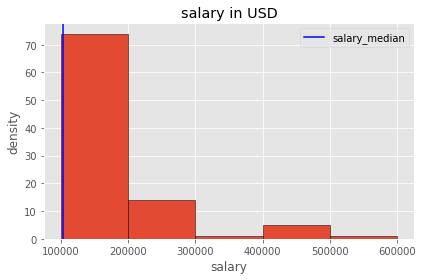

In [42]:
plt.style.use('ggplot')

bins= [100000,200000,300000,400000,500000,600000]
plt.hist(df['salary_in_usd'], bins = bins, edgecolor = 'black')
plt.xlabel('salary')
plt.ylabel('density')
plt.axvline(salary_median, color='blue', label='salary_median')
plt.legend()

plt.title('salary in USD')
plt.tight_layout()
plt.grid(True)
plt.show()

# SUBPLOT: No. of employees with respect to experience, employment type, remote ratio and company size

In [43]:
ex = df['experience_level'].value_counts()
em = df['employment_type'].value_counts()
rr = df['remote_ratio'].value_counts()
cs = df['company_size'].value_counts()
       

Text(0, 0.5, 'No. of employees')

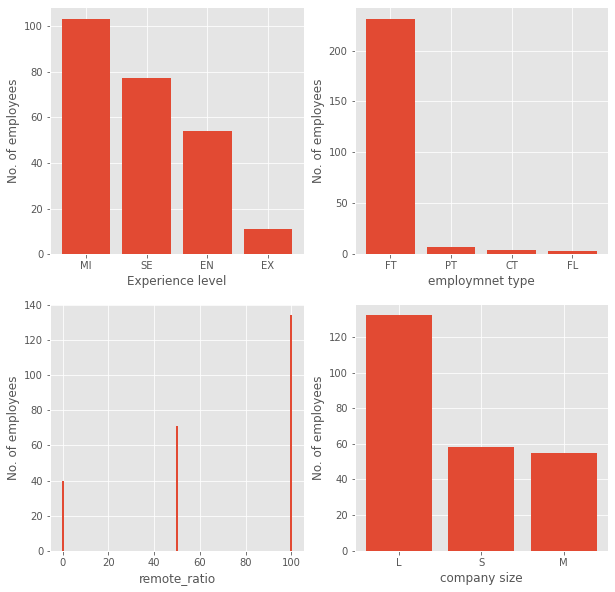

In [44]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].bar(ex.index,ex.values)
ax[0,0].set_xlabel('Experience level')
ax[0,0].set_ylabel('No. of employees')

ax[0,1].bar(em.index, em.values)
ax[0,1].set_xlabel('employmnet type')
ax[0,1].set_ylabel('No. of employees')

ax[1,0].bar(rr.index, rr.values)
ax[1,0].set_xlabel('remote_ratio')
ax[1,0].set_ylabel('No. of employees')

ax[1,1].bar(cs.index,cs.values)
ax[1,1].set_xlabel('company size')
ax[1,1].set_ylabel('No. of employees')


So to improve the remote ratio plot we can use the map method to replace the value of strings

# UPDATED SUBPLOT: No. of employees with respect to experience, employment type, remote ratio and company size

In [45]:
ex = df['experience_level'].value_counts()
em = df['employment_type'].value_counts()
rr = df['remote_ratio'].map({100:'Fully remote', 50:'Partially remote', 0:'Not remote'}).value_counts()
cs = df['company_size'].value_counts()
       

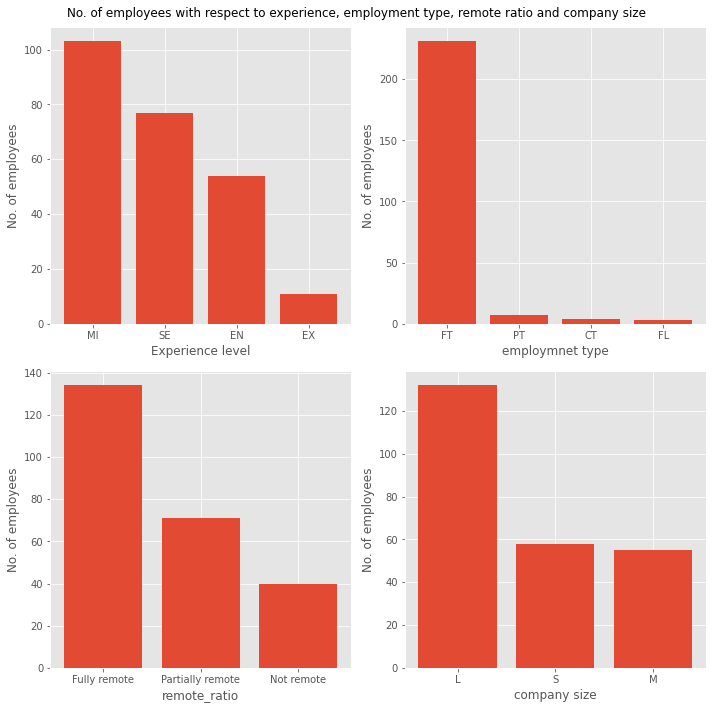

In [46]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].bar(ex.index,ex.values)
ax[0,0].set_xlabel('Experience level')
ax[0,0].set_ylabel('No. of employees')

ax[0,1].bar(em.index, em.values)
ax[0,1].set_xlabel('employmnet type')
ax[0,1].set_ylabel('No. of employees')

ax[1,0].bar(rr.index, rr.values)
ax[1,0].set_xlabel('remote_ratio')
ax[1,0].set_ylabel('No. of employees')

ax[1,1].bar(cs.index,cs.values)
ax[1,1].set_xlabel('company size')
ax[1,1].set_ylabel('No. of employees')

plt.suptitle('No. of employees with respect to experience, employment type, remote ratio and company size')
fig.tight_layout()
plt.show()

INSIGHTS:
1. Majority of the employees are employed by the large companies.
2. Majority of employees are working remotely.
3. Majority of employees are working full time.

# Employee location and company location, are they same?

In [47]:
lis =[]
for indx, val in enumerate (df['company_location']):
    if df.loc[indx, 'company_location']==df.loc[indx, 'employee_residence']:
        lis.append(True)
    else:
        lis.append(False)
print(lis)
        
    

[True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, False, True, True, False, True, True, True, True, False, True, True, True, True, 

In [48]:
pd.Series(lis).value_counts()

True     209
False     36
dtype: int64

In [49]:
EL_CL= pd.Series(lis).map({True:'Belong to same location', False:'Belong to different location'}).value_counts()

In [50]:
EL_CL

Belong to same location         209
Belong to different location     36
dtype: int64

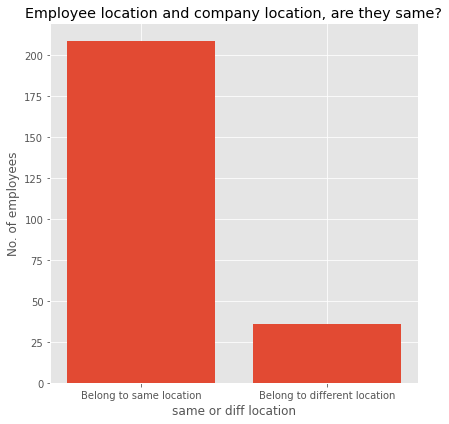

In [51]:
plt.style.use('ggplot')
plt.figure(figsize =(6,6))
plt.bar(EL_CL.index, EL_CL.values )
plt.xlabel('same or diff location')
plt.ylabel('No. of employees')


plt.title('Employee location and company location, are they same?')
plt.tight_layout()
plt.grid(True)
plt.show()

lets plot its pie chart also

In [52]:
labels = ['Belong to same location', 'Belong to different location']

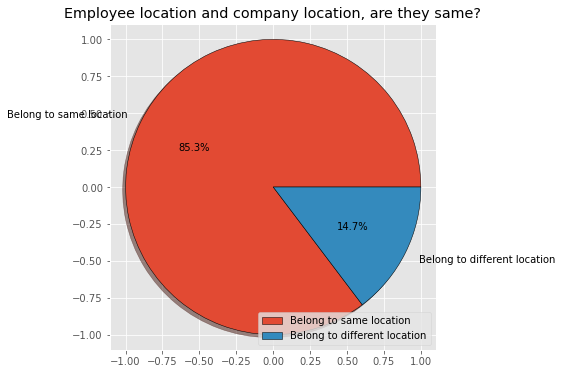

In [53]:
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.pie(EL_CL.values, labels=labels, autopct='%1.1f%%', shadow = True, frame = True, wedgeprops={'edgecolor':'black'})
plt.legend(loc = 'lower right')
plt.title('Employee location and company location, are they same?')
plt.show()

So from this we can clearly see that approx 200 employees have the same location as company location which is 85.3% of total employees.